# Lead Scoring Case Study - Logistic Regression

## Problem Statement:
An education company named X Education sells online courses to industry professionals. When people fill up a form providing their email address or phone number, they are classified to be a lead.Although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

## Step 1 - Data Reading, Understanding And Cleaning:

### A. Data Reading

In [1]:
# Ignore Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import numpy and pandas

import numpy as np
import pandas as pd

In [3]:
# Read csv file

lead_data = pd.read_csv("Leads.csv")
pd.set_option('display.max_columns', None)
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# Shape of lead_data

lead_data.shape

(9240, 37)

In [5]:
# Info of lead_data

lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
# Missing Values in each column before considering "Select" level. 

lead_data.isna().sum()/9240*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [7]:
# Missing values after replacing "Select" level as NAN value.
# Because non selecting is equal to NaN, so we can replace select by nan.

lead_data.replace("Select", None, inplace=True)

In [8]:
lead_data.isna().sum()/9240*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [9]:
# Describe given dadatset

lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### B. Dropping unwanted columns

In [10]:
# drop column with missing value more than 40%

lead_data.drop(["How did you hear about X Education", "Lead Quality", "Lead Profile", "Asymmetrique Activity Index", "Asymmetrique Profile Index", "Asymmetrique Activity Score", "Asymmetrique Profile Score"], axis=1, inplace=True)

In [11]:
# drop column "Prospect Id"  and set "Lead Number" as index

lead_data.drop(["Prospect ID"], axis=1, inplace=True)
lead_data.set_index("Lead Number",inplace=True)
lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,
660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,None,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,None,No,No,Modified
660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,None,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,None,No,No,Email Opened
660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,None,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


In [12]:
# Remove columns with mininum variation in data levels(>90%)

less_variation = []
for i in lead_data:
    #print("Value counts of = ", i)
    #print(lead_data[i].value_counts()/9240*100)
    if (lead_data[i].value_counts()/9240*100)[0]>90:
        print(i)
        less_variation.append(i)
less_variation

Do Not Email
Do Not Call
Search
Magazine
Newspaper Article
X Education Forums
Newspaper
Digital Advertisement
Through Recommendations
Receive More Updates About Our Courses
Update me on Supply Chain Content
Get updates on DM Content
I agree to pay the amount through cheque


['Do Not Email',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [13]:
lead_data.drop(less_variation,axis=1, inplace=True)

### C. Missing value imputation

In [14]:
# Column-wise missing vulues

lead_data.isna().sum()

Lead Origin                                         0
Lead Source                                        36
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Tags                                             3353
City                                             3669
A free copy of Mastering The Interview              0
Last Notable Activity                               0
dtype: int64

In [15]:
# Import required libraries

import matplotlib.pyplot as plt
import seaborn as sns

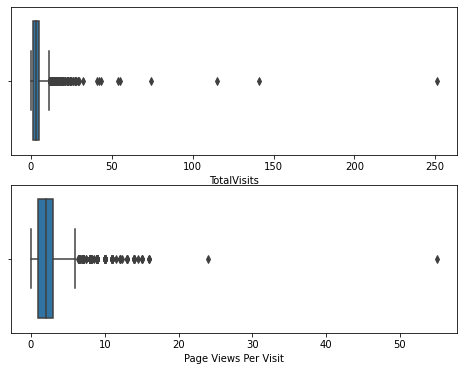

In [16]:
# Boxplot of numeric variables

plt.figure(figsize=(8,6))
plt.subplot(2,1,1)
sns.boxplot(lead_data["TotalVisits"])
plt.subplot(2,1,2)
sns.boxplot(lead_data["Page Views Per Visit"])
plt.show()

#### From above boxplot we can say that there are outliers. So we can fill na value on the basis of median. 

In [17]:
lead_data[["TotalVisits","Page Views Per Visit"]].median()

TotalVisits             3.0
Page Views Per Visit    2.0
dtype: float64

In [18]:
# Fill Nan with 3.0 and 2.0

lead_data["TotalVisits"].fillna(3.0,inplace=True)
lead_data["Page Views Per Visit"].fillna(2.0,inplace=True)

#### Replace Nan of categorical variables by mode of each column

In [19]:
for i in lead_data:
    if lead_data[i].isna().sum()>0:
        lead_data[i].fillna(lead_data[i].mode()[0],inplace=True)
        #print(lead_data[i].mode()[0])

In [20]:
lead_data.isna().sum()/9240*100

Lead Origin                                      0.0
Lead Source                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Tags                                             0.0
City                                             0.0
A free copy of Mastering The Interview           0.0
Last Notable Activity                            0.0
dtype: float64

In [21]:
# Remove columns with mininum variation in data levels(>90%) after imputing missing values.

less_variation1 = []
for i in lead_data:
    #print("Value counts of = ", i)
    #print(lead_data[i].value_counts()/9240*100)
    if (lead_data[i].value_counts()/9240*100)[0]>90:
        print(i)
        less_variation1.append(i)
less_variation1

Country
What matters most to you in choosing a course


['Country', 'What matters most to you in choosing a course']

In [22]:
lead_data.drop(less_variation1,axis=1, inplace=True)

### D. Outlieres treatment

In [23]:
lead_data[["TotalVisits","Page Views Per Visit"]].describe(percentiles=[0.01,0.25,0.50,0.75,0.99])

,TotalVisits,Page Views Per Visit
count,9240.000000,9240.000000
mean,3.438636,2.357440
std,4.819024,2.145781
min,0.000000,0.000000
1%,0.000000,0.000000
25%,1.000000,1.000000
50%,3.000000,2.000000
75%,5.000000,3.000000
99%,17.000000,9.000000
max,251.000000,55.000000


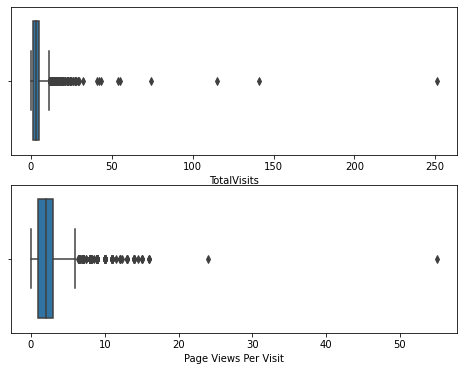

In [24]:
# Boxplot of numeric variables

plt.figure(figsize=(8,6))
plt.subplot(2,1,1)
sns.boxplot(lead_data["TotalVisits"])
plt.subplot(2,1,2)
sns.boxplot(lead_data["Page Views Per Visit"])
plt.show()

In [25]:
# We can cap outliers to 99% that is 17.0 for "TotalVisits" and 9.0 for "Page Views Per Visit"

for i in lead_data["TotalVisits"]:
    if i > 40:
        lead_data["TotalVisits"].replace(i,17.0,inplace=True)

In [26]:
for i in lead_data["Page Views Per Visit"]:
    if i > 10:
        lead_data["Page Views Per Visit"].replace(i,9.0,inplace=True)

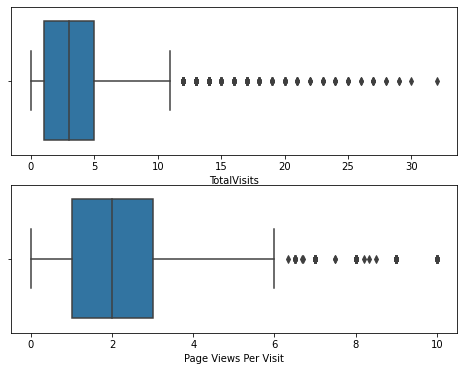

In [27]:
# Boxplot after capping

plt.figure(figsize=(8,6))
plt.subplot(2,1,1)
sns.boxplot(lead_data["TotalVisits"])
plt.subplot(2,1,2)
sns.boxplot(lead_data["Page Views Per Visit"])
plt.show()

In [28]:
# Describe after capping 

lead_data[["TotalVisits","Page Views Per Visit"]].describe()

,TotalVisits,Page Views Per Visit
count,9240.000000,9240.000000
mean,3.366883,2.331755
std,3.432466,1.981164
min,0.000000,0.000000
25%,1.000000,1.000000
50%,3.000000,2.000000
75%,5.000000,3.000000
max,32.000000,10.000000


In [29]:
lead_data.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
Lead Number,,,,,,,,,,,,,
660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Finance Management,Unemployed,Interested in other courses,Mumbai,No,Modified
660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Finance Management,Unemployed,Ringing,Mumbai,No,Email Opened
660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Yes,Email Opened
660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Mumbai,No,Modified
660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Finance Management,Unemployed,Will revert after reading the email,Mumbai,No,Modified


In [30]:
lead_data.shape

(9240, 13)

## Step 2 - Visualising lead_data

### A. Univariate analysis of numerical variables

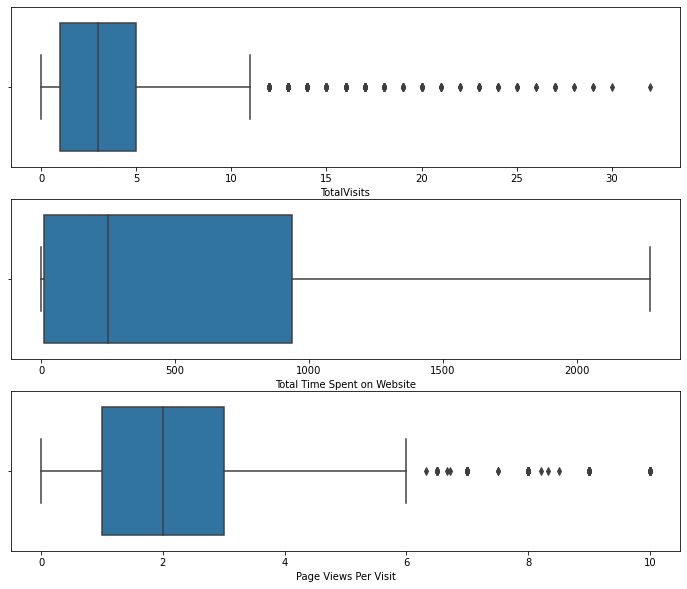

In [31]:
plt.figure(figsize=(12,10))
plt.subplot(3,1,1)
sns.boxplot(lead_data["TotalVisits"])
plt.subplot(3,1,2)
sns.boxplot(lead_data["Total Time Spent on Website"])
plt.subplot(3,1,3)
sns.boxplot(lead_data["Page Views Per Visit"])
plt.show()

### B. Unhivariate analysis of categorical variables

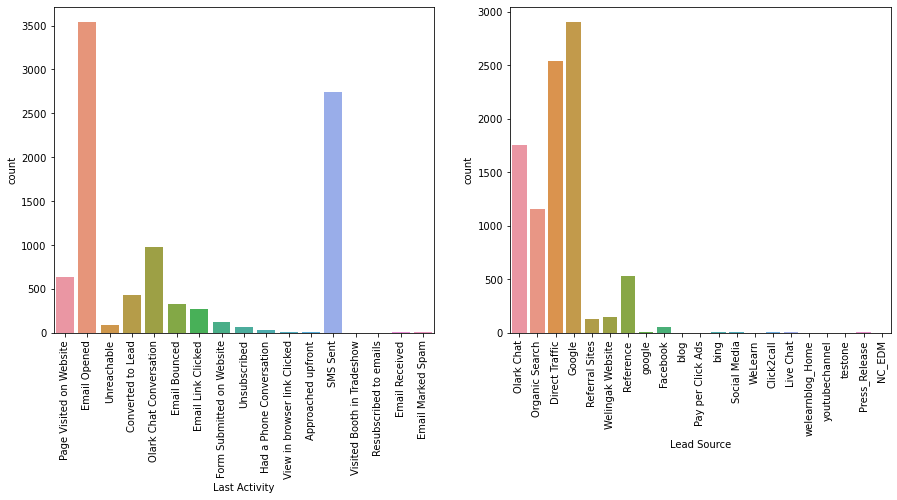

In [32]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(lead_data["Last Activity"])
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(lead_data["Lead Source"])
plt.xticks(rotation=90)
plt.show()

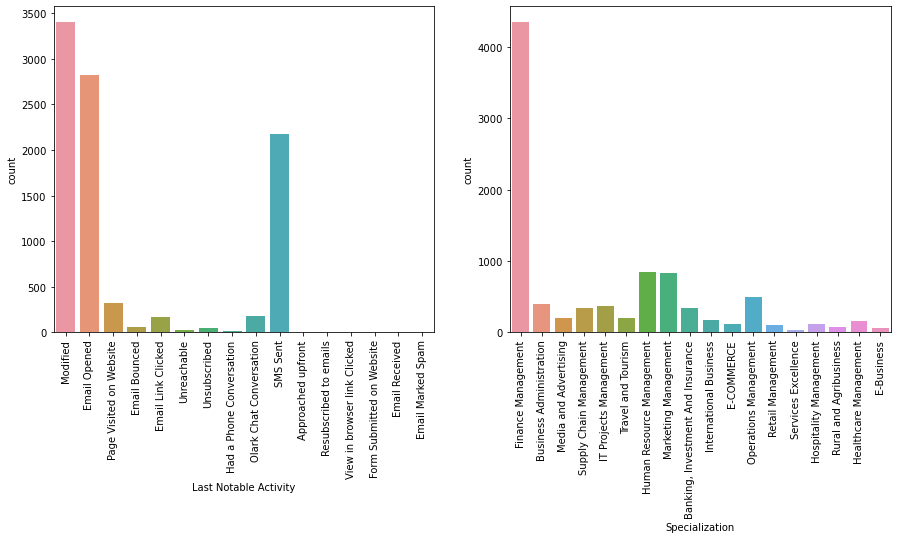

In [33]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(lead_data["Last Notable Activity"])
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(lead_data["Specialization"])
plt.xticks(rotation=90)
plt.show()

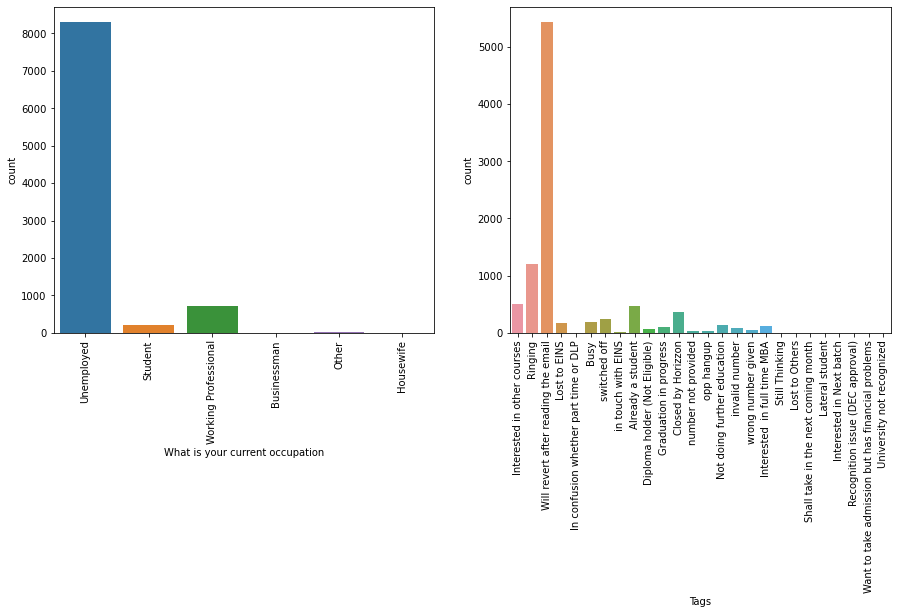

In [34]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(lead_data["What is your current occupation"])
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(lead_data["Tags"])
plt.xticks(rotation=90)
plt.show()

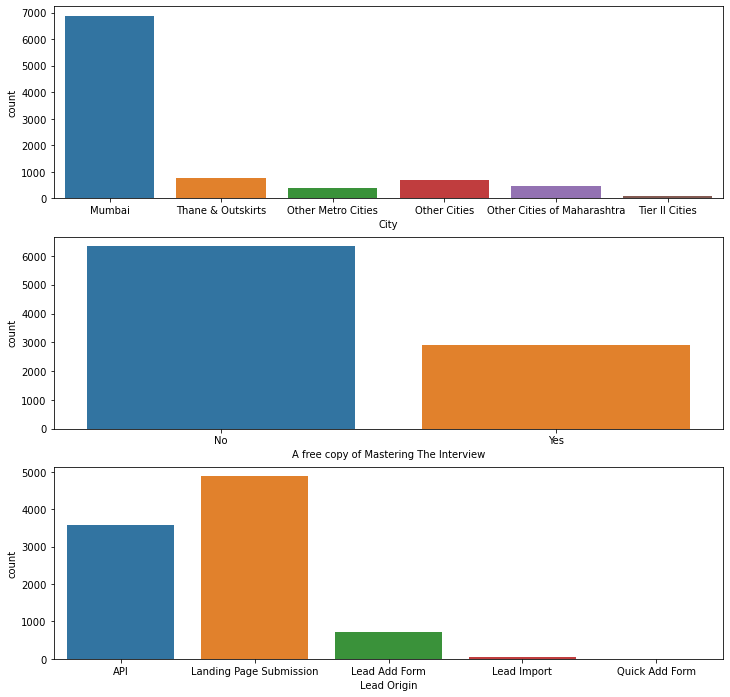

In [35]:
plt.figure(figsize=(12,12))
plt.subplot(3,1,1)
sns.countplot(lead_data["City"])
plt.subplot(3,1,2)
sns.countplot(lead_data["A free copy of Mastering The Interview"])
plt.subplot(3,1,3)
sns.countplot(lead_data["Lead Origin"])
plt.show()

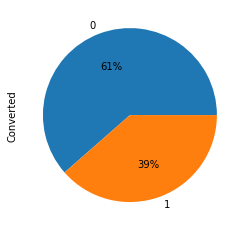

In [36]:
# Analysis of target variable

(lead_data.Converted.value_counts(normalize=True)*100).plot.pie(autopct="%.0f%%")
plt.show()

### C. Bivariate analysis of numeric varianbles

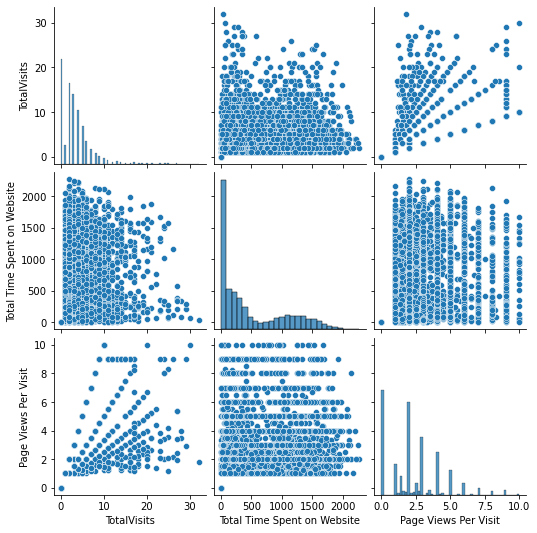

In [37]:
# Pairplot of Numeric variables

sns.pairplot(lead_data[["TotalVisits", "Total Time Spent on Website", "Page Views Per Visit"]])
plt.show()

### D. Bivariate analysis of categorical variables

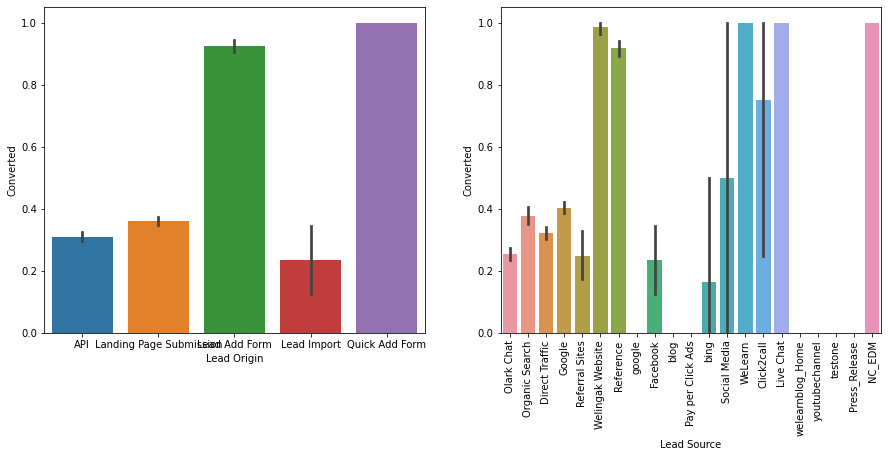

In [38]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(x="Lead Origin", y="Converted", data= lead_data)
plt.subplot(1,2,2)
sns.barplot(x="Lead Source", y="Converted", data= lead_data)
plt.xticks(rotation=90)
plt.show()

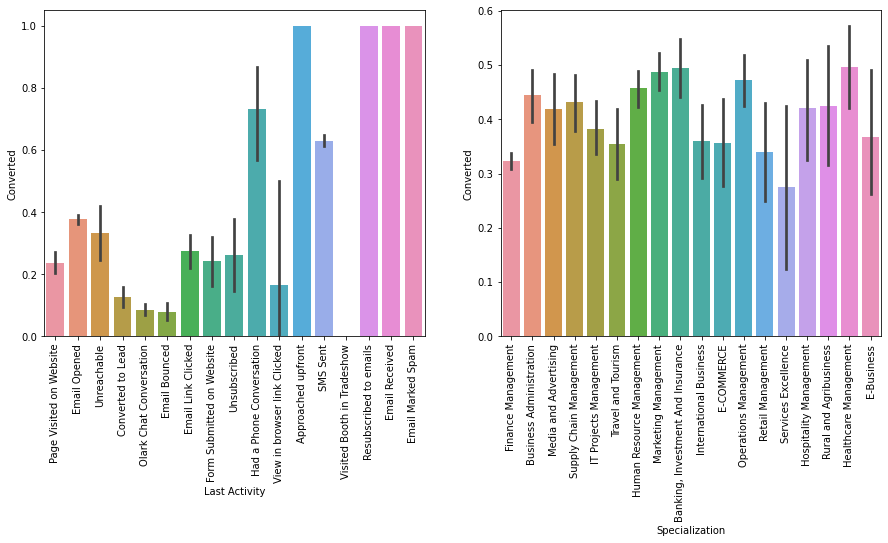

In [39]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(x="Last Activity", y="Converted", data= lead_data)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.barplot(x="Specialization", y="Converted", data= lead_data)
plt.xticks(rotation=90)
plt.show()

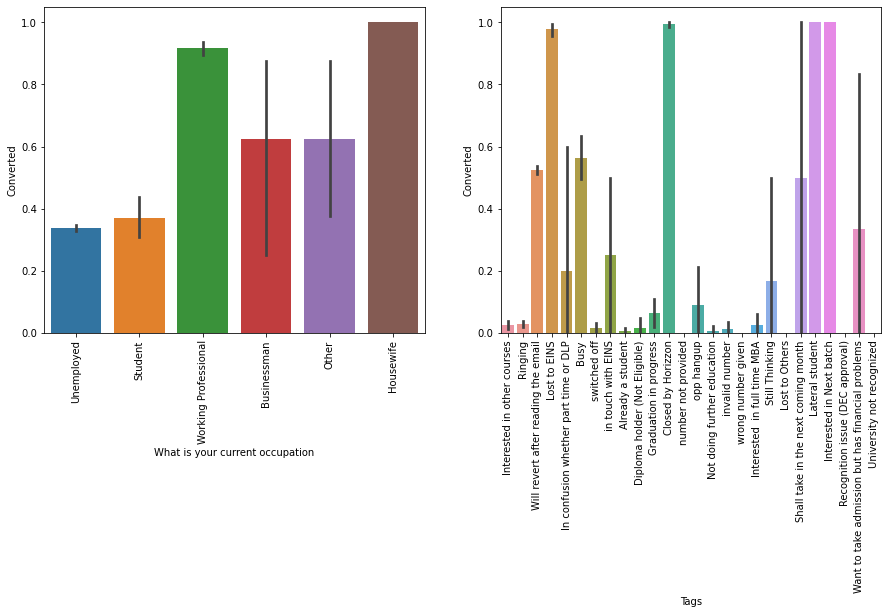

In [40]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(x="What is your current occupation", y="Converted", data= lead_data)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.barplot(x="Tags", y="Converted", data= lead_data)
plt.xticks(rotation=90)
plt.show()

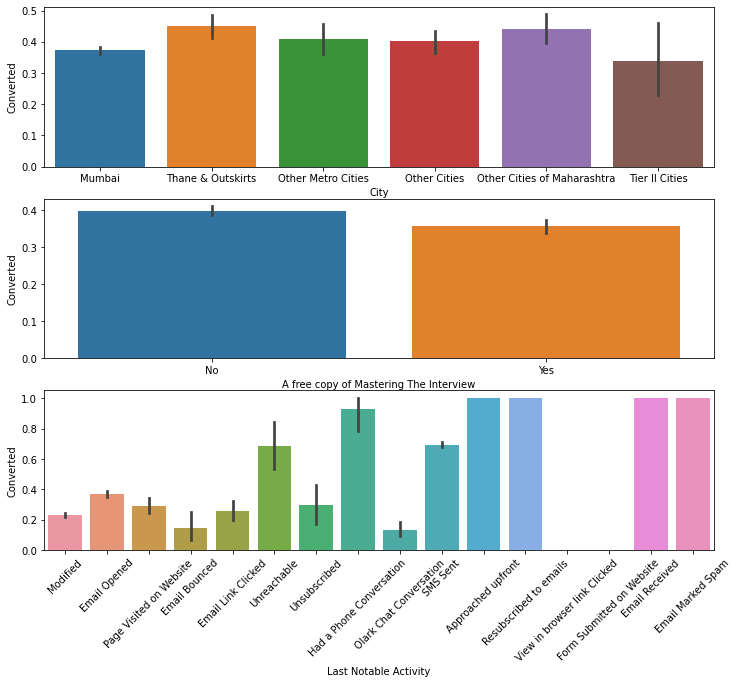

In [41]:
plt.figure(figsize=(12,10))
plt.subplot(3,1,1)
sns.barplot(x="City", y="Converted", data= lead_data)
plt.subplot(3,1,2)
sns.barplot(x="A free copy of Mastering The Interview", y="Converted", data= lead_data)
plt.subplot(3,1,3)
sns.barplot(x="Last Notable Activity", y="Converted", data= lead_data)
plt.xticks(rotation=45)
plt.show()

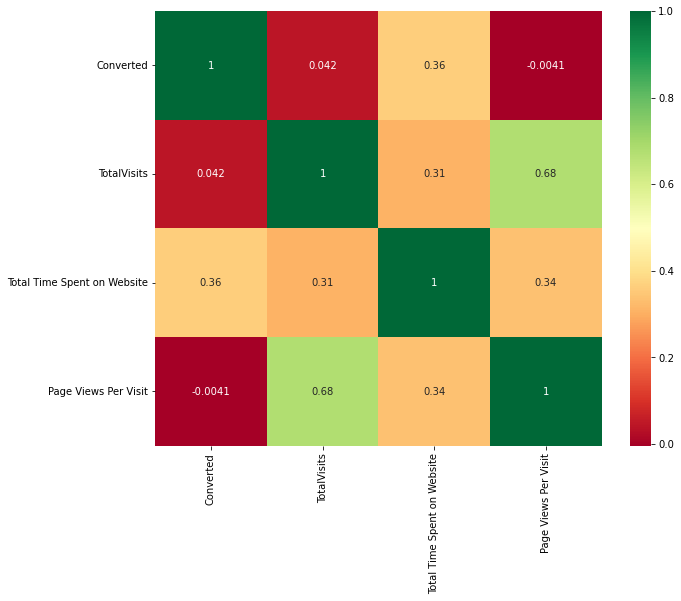

In [42]:
# Let's see the correlation matrix 

plt.figure(figsize = (10,8))       
sns.heatmap(lead_data.corr(),annot = True, cmap="RdYlGn")
plt.show()

## Step 3 - Data Preparation

### A. Create dummy features

In [43]:
# Convert "Yes"/"No" variablse to 1/0

varlist= ["A free copy of Mastering The Interview"] 

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
lead_data[varlist] = lead_data[varlist].apply(binary_map)

In [44]:
lead_data.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
Lead Number,,,,,,,,,,,,,
660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Finance Management,Unemployed,Interested in other courses,Mumbai,0,Modified
660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Finance Management,Unemployed,Ringing,Mumbai,0,Email Opened
660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,1,Email Opened
660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Mumbai,0,Modified
660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Finance Management,Unemployed,Will revert after reading the email,Mumbai,0,Modified


In [45]:
# Creating a dummy variable for some of the categorical variables and dropping the first one and concat to master data


dummy_data = pd.get_dummies(lead_data[['Lead Origin', 'Lead Source', 'Last Activity','Specialization','What is your current occupation','Tags','City','Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe

lead_data = pd.concat([lead_data, dummy_data], axis=1)

In [46]:
# Dropping the repeated variables

lead_data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation', 'Tags','City','Last Notable Activity'],axis=1,inplace=True)

In [47]:
lead_data.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
660737,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
660728,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,

In [48]:
lead_data.shape

(9240, 112)

### B. Splitting data into training and testing dataset

In [49]:
# Import train_test_split

from sklearn.model_selection import train_test_split

In [50]:
# Split data into 7:3

df_train, df_test = train_test_split(lead_data, train_size=0.7, test_size=0.3, random_state=100)

In [51]:
# Shape after split

df_train.shape, df_test.shape

((6468, 112), (2772, 112))

### C. Rescaling  dataset

In [52]:
# Rescale by using minmaxscaler
# import required lib

from sklearn.preprocessing import MinMaxScaler

var = ["TotalVisits", "Total Time Spent on Website", "Page Views Per Visit"]
scalar = MinMaxScaler()
df_train[var] = scalar.fit_transform(df_train[var])
df_test[var] = scalar.transform(df_test[var])
df_test.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
619003,1,0.25000,0.444982,0.8,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
636884,1,0.00000,0.000000,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,

## Step 4 - Model Building

In [53]:
# Divide train dataset into x_train and y_train

y_train = df_train.pop("Converted")
X_train = df_train



In [54]:
# Divide train dataset into x_test and y_test

y_test = df_test.pop("Converted")
X_test = df_test

In [55]:
X_train.shape, X_test.shape

((6468, 111), (2772, 111))

In [56]:
# we can build model by using Recursive feature elimination(RFE)
# import required lib

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [57]:
# Feature selection using RFE and fitting model

logreg = LogisticRegression()


rfe = RFE(logreg,n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [58]:
# Total column supported by RFE

col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Last Activity_Email Bounced',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lateral student', 'Tags_Lost to EINS',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_in touch with EINS', 'Tags_invalid number', 'Tags_switched off',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [59]:
len(col)

15

In [60]:
# Creating X_train dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [61]:
# Adding a constant variable 

import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [62]:
X_train_rfe.head()

,const,Total Time Spent on Website,Lead Origin_Lead Add Form,Last Activity_Email Bounced,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Lateral student,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_switched off,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_SMS Sent
Lead Number,,,,,,,,,,,,,,,,
641410,1.0,0.000000,0,0,0,0,0,0,0,1,0,0,0,0,0,0
597687,1.0,0.214349,0,0,0,0,0,0,0,0,1,0,0,0,0,0
626825,1.0,0.046655,0,0,0,0,0,0,0,1,0,0,0,0,0,0
587928,1.0,0.541373,0,0,0,0,0,0,0,1,0,0,0,0,0,1
622366,1.0,0.000000,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [63]:
# Fitting logistic model on X_train_rfe

logm = sm.GLM(y_train,X_train_rfe,family = sm.families.Binomial()).fit() 

In [64]:
#Let's see the summary of our linear model

print(logm.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1830.8
Date:                Tue, 15 Nov 2022   Deviance:                       3661.6
Time:                        11:21:14   Pearson chi2:                 1.19e+04
No. Iterations:                    20   Pseudo R-squ. (CS):             0.5338
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [65]:
# P-value of Tags_Lateral student is more than 0.05 so we have to drop it

X_train_rfe.drop(["Tags_Lateral student"], axis=1, inplace=True)

In [66]:
# Adding a constant variable 

import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [67]:
X_train_rfe.head()

,const,Total Time Spent on Website,Lead Origin_Lead Add Form,Last Activity_Email Bounced,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_switched off,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_SMS Sent
Lead Number,,,,,,,,,,,,,,,
641410,1.0,0.000000,0,0,0,0,0,0,1,0,0,0,0,0,0
597687,1.0,0.214349,0,0,0,0,0,0,0,1,0,0,0,0,0
626825,1.0,0.046655,0,0,0,0,0,0,1,0,0,0,0,0,0
587928,1.0,0.541373,0,0,0,0,0,0,1,0,0,0,0,0,1
622366,1.0,0.000000,0,0,0,0,0,0,0,1,0,0,0,0,0


In [68]:
# Fitting logistic model on X_train_rfe

logm1 = sm.GLM(y_train,X_train_rfe,family = sm.families.Binomial()).fit() 

In [69]:
#Let's see the summary of our linear model

print(logm1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1840.4
Date:                Tue, 15 Nov 2022   Deviance:                       3680.7
Time:                        11:21:17   Pearson chi2:                 1.20e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5325
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [70]:
# P-value of Tags_Lateral student is more than 0.05 so we have to drop it

X_train_rfe.drop(["Tags_invalid number"], axis=1, inplace=True)

In [71]:
# Adding a constant variable 

import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [72]:
# Fitting logistic model on X_train_rfe

logm2 = sm.GLM(y_train,X_train_rfe,family = sm.families.Binomial()).fit() 

In [73]:
#Let's see the summary of our linear model

print(logm2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1842.4
Date:                Tue, 15 Nov 2022   Deviance:                       3684.9
Time:                        11:21:22   Pearson chi2:                 1.21e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5322
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [74]:
# P-value of all variable is less than 0.05 lets check VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe.drop(["const"],axis=True)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Tags_Will revert after reading the email,1.85
0,Total Time Spent on Website,1.83
12,Last Notable Activity_SMS Sent,1.52
1,Lead Origin_Lead Add Form,1.37
5,Tags_Closed by Horizzon,1.31
3,What is your current occupation_Working Profes...,1.19
7,Tags_Ringing,1.15
4,Tags_Busy,1.05
6,Tags_Lost to EINS,1.04
10,Tags_switched off,1.04


#### VIF for all variebles are less than 5 

## Step 5 - Evaluation

In [75]:
# Getting the predicted values on the train set

y_train_pred = logm2.predict(X_train_rfe)
y_train_pred[:10]

Lead Number
641410    0.001287
597687    0.306854
626825    0.001576
587928    0.154945
622366    0.148358
613574    0.998432
628456    0.001514
588051    0.999957
649586    0.453458
592598    0.979122
dtype: float64

In [76]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.00128705, 0.30685379, 0.00157628, 0.15494517, 0.14835821,
       0.99843228, 0.00151424, 0.99995661, 0.45345813, 0.97912245])

In [77]:
# Creating a dataframe with the actual Converted and the predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted_Actual':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final.head()

,Converted_Actual,Converted_Prob
0,0,0.001287
1,0,0.306854
2,0,0.001576
3,0,0.154945
4,0,0.148358


In [78]:
# Creating probability score and binary column

y_train_pred_final["Prob_Score"] = round(y_train_pred_final.Converted_Prob*100,2)
y_train_pred_final["Predicted"] =  y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted_Actual,Converted_Prob,Prob_Score,Predicted
0,0,0.001287,0.13,0
1,0,0.306854,30.69,0
2,0,0.001576,0.16,0
3,0,0.154945,15.49,0
4,0,0.148358,14.84,0


#### Confusion Matrix, Recall and accuracy before Optimal Threshold 

In [79]:
# Let's take a look at the confusion matrix
 
from sklearn import metrics

confusion = metrics.confusion_matrix(y_train_pred_final.Converted_Actual, y_train_pred_final.Predicted )
confusion

array([[3710,  292],
       [ 401, 2065]], dtype=int64)

In [80]:
# Recall and Accuracy

print("Recall =", metrics.recall_score(y_train_pred_final.Converted_Actual, y_train_pred_final.Predicted))
print("Accuracy =",metrics.accuracy_score(y_train_pred_final.Converted_Actual, y_train_pred_final.Predicted))

Recall = 0.8373884833738848
Accuracy = 0.8928571428571429


## Step 6 - ROC And Optimal Threshold

#### ROC

In [81]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [82]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted_Actual, y_train_pred_final.Converted_Prob, drop_intermediate = False )

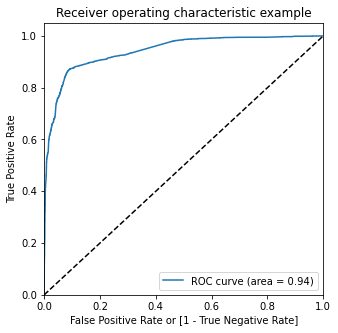

In [83]:
draw_roc(y_train_pred_final.Converted_Actual, y_train_pred_final.Converted_Prob)

#### Confusion Matrix, Recall and accuracy after Optimal Threshold

In [84]:
# Let's create columns with different probability cutoffs

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted_Actual,Converted_Prob,Prob_Score,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.001287,0.13,0,1,0,0,0,0,0,0,0,0,0
1,0,0.306854,30.69,0,1,1,1,1,0,0,0,0,0,0
2,0,0.001576,0.16,0,1,0,0,0,0,0,0,0,0,0
3,0,0.154945,15.49,0,1,1,0,0,0,0,0,0,0,0
4,0,0.148358,14.84,0,1,1,0,0,0,0,0,0,0,0


In [85]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted_Actual, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.697897  0.982563  0.522489
0.2   0.2  0.833333  0.908759  0.786857
0.3   0.3  0.887446  0.879157  0.892554
0.4   0.4  0.896104  0.863341  0.916292
0.5   0.5  0.892857  0.837388  0.927036
0.6   0.6  0.883890  0.793187  0.939780
0.7   0.7  0.873531  0.736415  0.958021
0.8   0.8  0.840909  0.612733  0.981509
0.9   0.9  0.809369  0.513382  0.991754


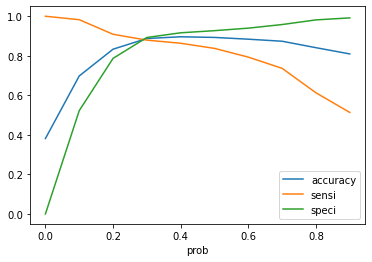

In [86]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [87]:
# Adding column with 0.3 cutoff

y_train_pred_final["Predicted_0.3"] =  y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()

,Converted_Actual,Converted_Prob,Prob_Score,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Predicted_0.3
0,0,0.001287,0.13,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.306854,30.69,0,1,1,1,1,0,0,0,0,0,0,1
2,0,0.001576,0.16,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.154945,15.49,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.148358,14.84,0,1,1,0,0,0,0,0,0,0,0,0


In [88]:
# Confusion matrix after optimal cutoff

confusion_03 = metrics.confusion_matrix(y_train_pred_final.Converted_Actual, y_train_pred_final["Predicted_0.3"] )
confusion_03

array([[3572,  430],
       [ 298, 2168]], dtype=int64)

In [89]:
# Recall and Accuracy

print("Recall =", metrics.recall_score(y_train_pred_final.Converted_Actual, y_train_pred_final['Predicted_0.3']))
print("Accuracy =",metrics.accuracy_score(y_train_pred_final.Converted_Actual, y_train_pred_final['Predicted_0.3']))
print("Precision =", metrics.precision_score(y_train_pred_final.Converted_Actual, y_train_pred_final['Predicted_0.3']))

Recall = 0.8791565287915653
Accuracy = 0.8874458874458875
Precision = 0.8344880677444187


## Step 7 - Making Prediction On Test Data Set

In [90]:
X_test = sm.add_constant(X_test)

In [91]:
# Creating new test data set

X_test_new = X_test[X_train_rfe.columns] 
X_test_new.head()

,const,Total Time Spent on Website,Lead Origin_Lead Add Form,Last Activity_Email Bounced,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_switched off,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_SMS Sent
Lead Number,,,,,,,,,,,,,,
619003,1.0,0.444982,0,0,0,0,0,0,0,1,0,0,0,1
636884,1.0,0.000000,1,0,0,0,0,0,0,1,0,0,0,1
590281,1.0,0.025968,0,0,1,0,0,0,0,1,0,0,0,0
579892,1.0,0.000000,0,0,0,0,0,0,0,0,0,0,0,0
617929,1.0,0.000000,1,0,0,0,0,0,0,1,0,0,0,0


In [92]:
# Adding constunt and predicting test data

X_test_new = sm.add_constant(X_test_new)
y_test_pred = logm2.predict(X_test_new)
y_test_pred[:10]

Lead Number
619003    0.942178
636884    0.985333
590281    0.748544
579892    0.005246
617929    0.832745
579992    0.883572
643289    0.547974
581637    0.225433
588474    0.251857
609001    0.761525
dtype: float64

In [93]:
y_test_pred = y_test_pred.values.reshape(-1)
y_test_pred[:10]

array([0.94217839, 0.9853331 , 0.74854403, 0.00524634, 0.83274546,
       0.88357166, 0.54797375, 0.22543279, 0.25185699, 0.76152511])

In [94]:
# Creating a dataframe with the actual Converted and the predicted probabilities

y_test_pred_final = pd.DataFrame({'Converted_Actual':y_test.values, 'Converted_Prob':y_test_pred})
y_test_pred_final.head()

,Converted_Actual,Converted_Prob
0,1,0.942178
1,1,0.985333
2,1,0.748544
3,0,0.005246
4,1,0.832745


In [95]:
# Creating probability score and binary column

y_test_pred_final["Prob_Score"] = round(y_test_pred_final.Converted_Prob*100,2)
y_test_pred_final["Predicted"] =  y_test_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)
y_test_pred_final.head()

,Converted_Actual,Converted_Prob,Prob_Score,Predicted
0,1,0.942178,94.22,1
1,1,0.985333,98.53,1
2,1,0.748544,74.85,1
3,0,0.005246,0.52,0
4,1,0.832745,83.27,1


#### Confusion Matrix, Recall and accuracy of test data

In [96]:
# Let's take a look at the confusion matrix of test data
 

confusion_test = metrics.confusion_matrix(y_test_pred_final.Converted_Actual, y_test_pred_final.Predicted )
confusion_test

array([[1483,  194],
       [ 114,  981]], dtype=int64)

In [97]:
# Recall and Accuracy of test data

print("Recall_test =", metrics.recall_score(y_test_pred_final.Converted_Actual, y_test_pred_final['Predicted']))
print("Accuracy_test =",metrics.accuracy_score(y_test_pred_final.Converted_Actual, y_test_pred_final['Predicted']))
print("Precision =", metrics.precision_score(y_test_pred_final.Converted_Actual, y_test_pred_final['Predicted']))

Recall_test = 0.8958904109589041
Accuracy_test = 0.8888888888888888
Precision = 0.8348936170212766


In [98]:
# Recall on train and test data at 0.3 probability

print("Recall_train =", metrics.recall_score(y_train_pred_final.Converted_Actual, y_train_pred_final['Predicted_0.3']))
print("Recall_test  =", metrics.recall_score(y_test_pred_final.Converted_Actual, y_test_pred_final['Predicted']))

Recall_train = 0.8791565287915653
Recall_test  = 0.8958904109589041


In [99]:
# F1 score on train and test data at 0.3 probability

# F1_score = 2*(precision*recall/precision+recall)

F1_train = 2*( 0.8344880677444187*0.8791565287915653/( 0.8344880677444187+0.8791565287915653))
F1_test  = 2*( 0.8348936170212766*0.8958904109589041/(0.8348936170212766+0.8958904109589041))
print("F1_train = ", F1_train)
print("F1_teas = ", F1_test)

F1_train =  0.8562401263823063
F1_teas =  0.86431718061674
